# Loading packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

# Loading Data

In [2]:
df=pd.read_csv('http://bit.ly/w-data')

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Check for missing values

In [4]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

 data has no missing values

# Check for outliers

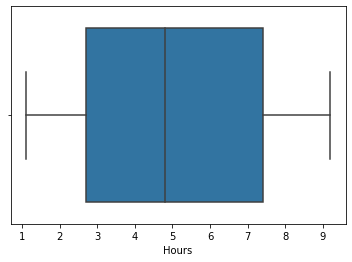

In [5]:
sns.boxplot('Hours',data=df)

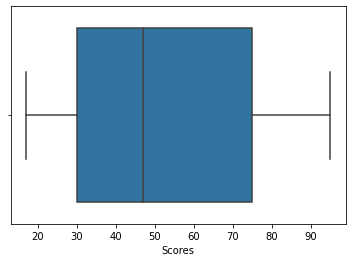

In [6]:
sns.boxplot('Scores',data=df)

there is no outlier in data

# Scatter plot

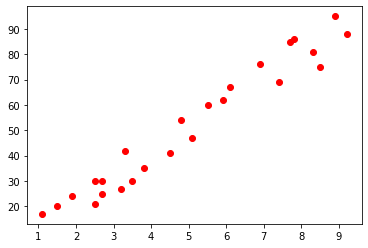

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(df['Hours'],df['Scores'],c='r')

# Split data in dependent and independent variables

In [8]:
x=df['Hours']
y=df['Scores']


In [9]:
x=np.array(x)
x=np.reshape(x,(-1,1))
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

# Train Test Split

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

# Linear Regression

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
lreg=LinearRegression()

In [14]:
lreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Regression plot

Text(0.5, 1.0, 'regression plot')

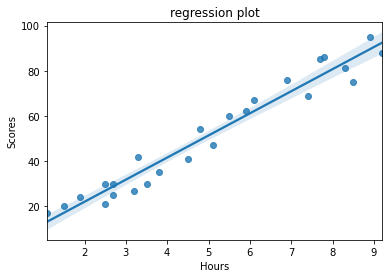

In [15]:
regression_plot=sns.regplot(x='Hours',y='Scores',data=df)
regression_plot.set_title('regression plot')

In [16]:
pred=lreg.predict(x_test)

In [17]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': pred})  
df1

,Actual,Predicted
8,81,83.391686
16,30,27.070549
0,21,27.070549
23,76,69.796929
11,62,60.086388
9,25,29.012657
13,42,34.838982
1,47,52.317955


# Evaluation

In [18]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [19]:
print('R2 value is',( r2_score(y_test,pred)))
print('mean absolute error is',(mean_absolute_error(y_test,pred)))
print('mean squared error is',(mean_squared_error(y_test,pred)))

R2 value is 0.9487647340257012
mean absolute error is 4.499999999999998
mean squared error is 23.61945761415174


# Predicting the score of a student studing 9.25 hours

In [20]:
hours=np.array(9.25)
hours=np.reshape(hours,(-1,1))
hours


array([[9.25]])

In [21]:
score=lreg.predict(hours)
score

array([92.61670034])